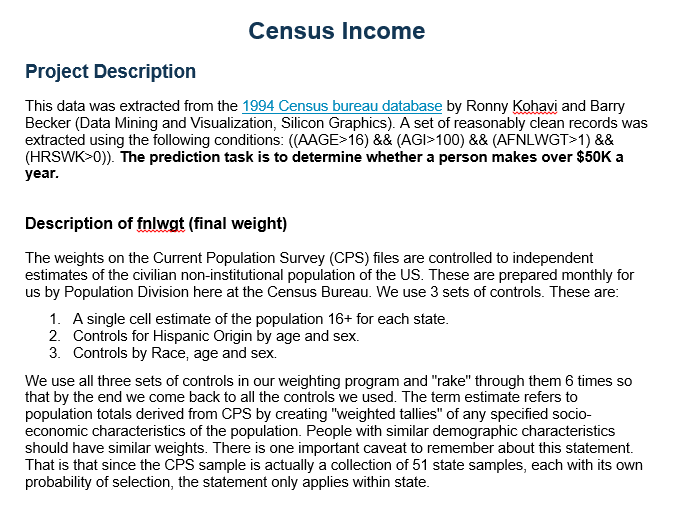
Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Census%20Income/Census%20Income.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, classification_report, accuracy_score,confusion_matrix,mean_absolute_error,mean_squared_error,roc_auc_score


In [27]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# there are columns with object value 
# no nulls

In [29]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
# Data Pre processing

In [30]:
x=df.drop('Income',axis=1)
y=df['Income']

In [31]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [33]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
    print('------------------------------------')

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64


------------------------------------
Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


------------------------------------
Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64


------------------------------------
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               51

In [39]:
# In column 'worlk class','Native_country' & 'Occupation' we can see value with '?' with 1836  & 1843count

In [34]:
df['Workclass'] = df['Workclass'].str.strip()
df['Occupation'] = df['Occupation'].str.strip()
df['Native_country'] = df['Native_country'].str.strip()



df.replace('?', np.nan, inplace=True)

# Check if '?' values are replaced
print(df[['Workclass', 'Occupation', 'Native_country']].isnull().sum())


Workclass         1836
Occupation        1843
Native_country     583
dtype: int64


In [35]:
#  fill with the mode of each column
df['Workclass'].fillna(df['Workclass'].mode()[0], inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0], inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0], inplace=True)


In [36]:
df['Workclass'].value_counts()

Workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [46]:
df['Occupation'].value_counts()

Occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [47]:
df['Native_country'].value_counts()

Native_country
United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

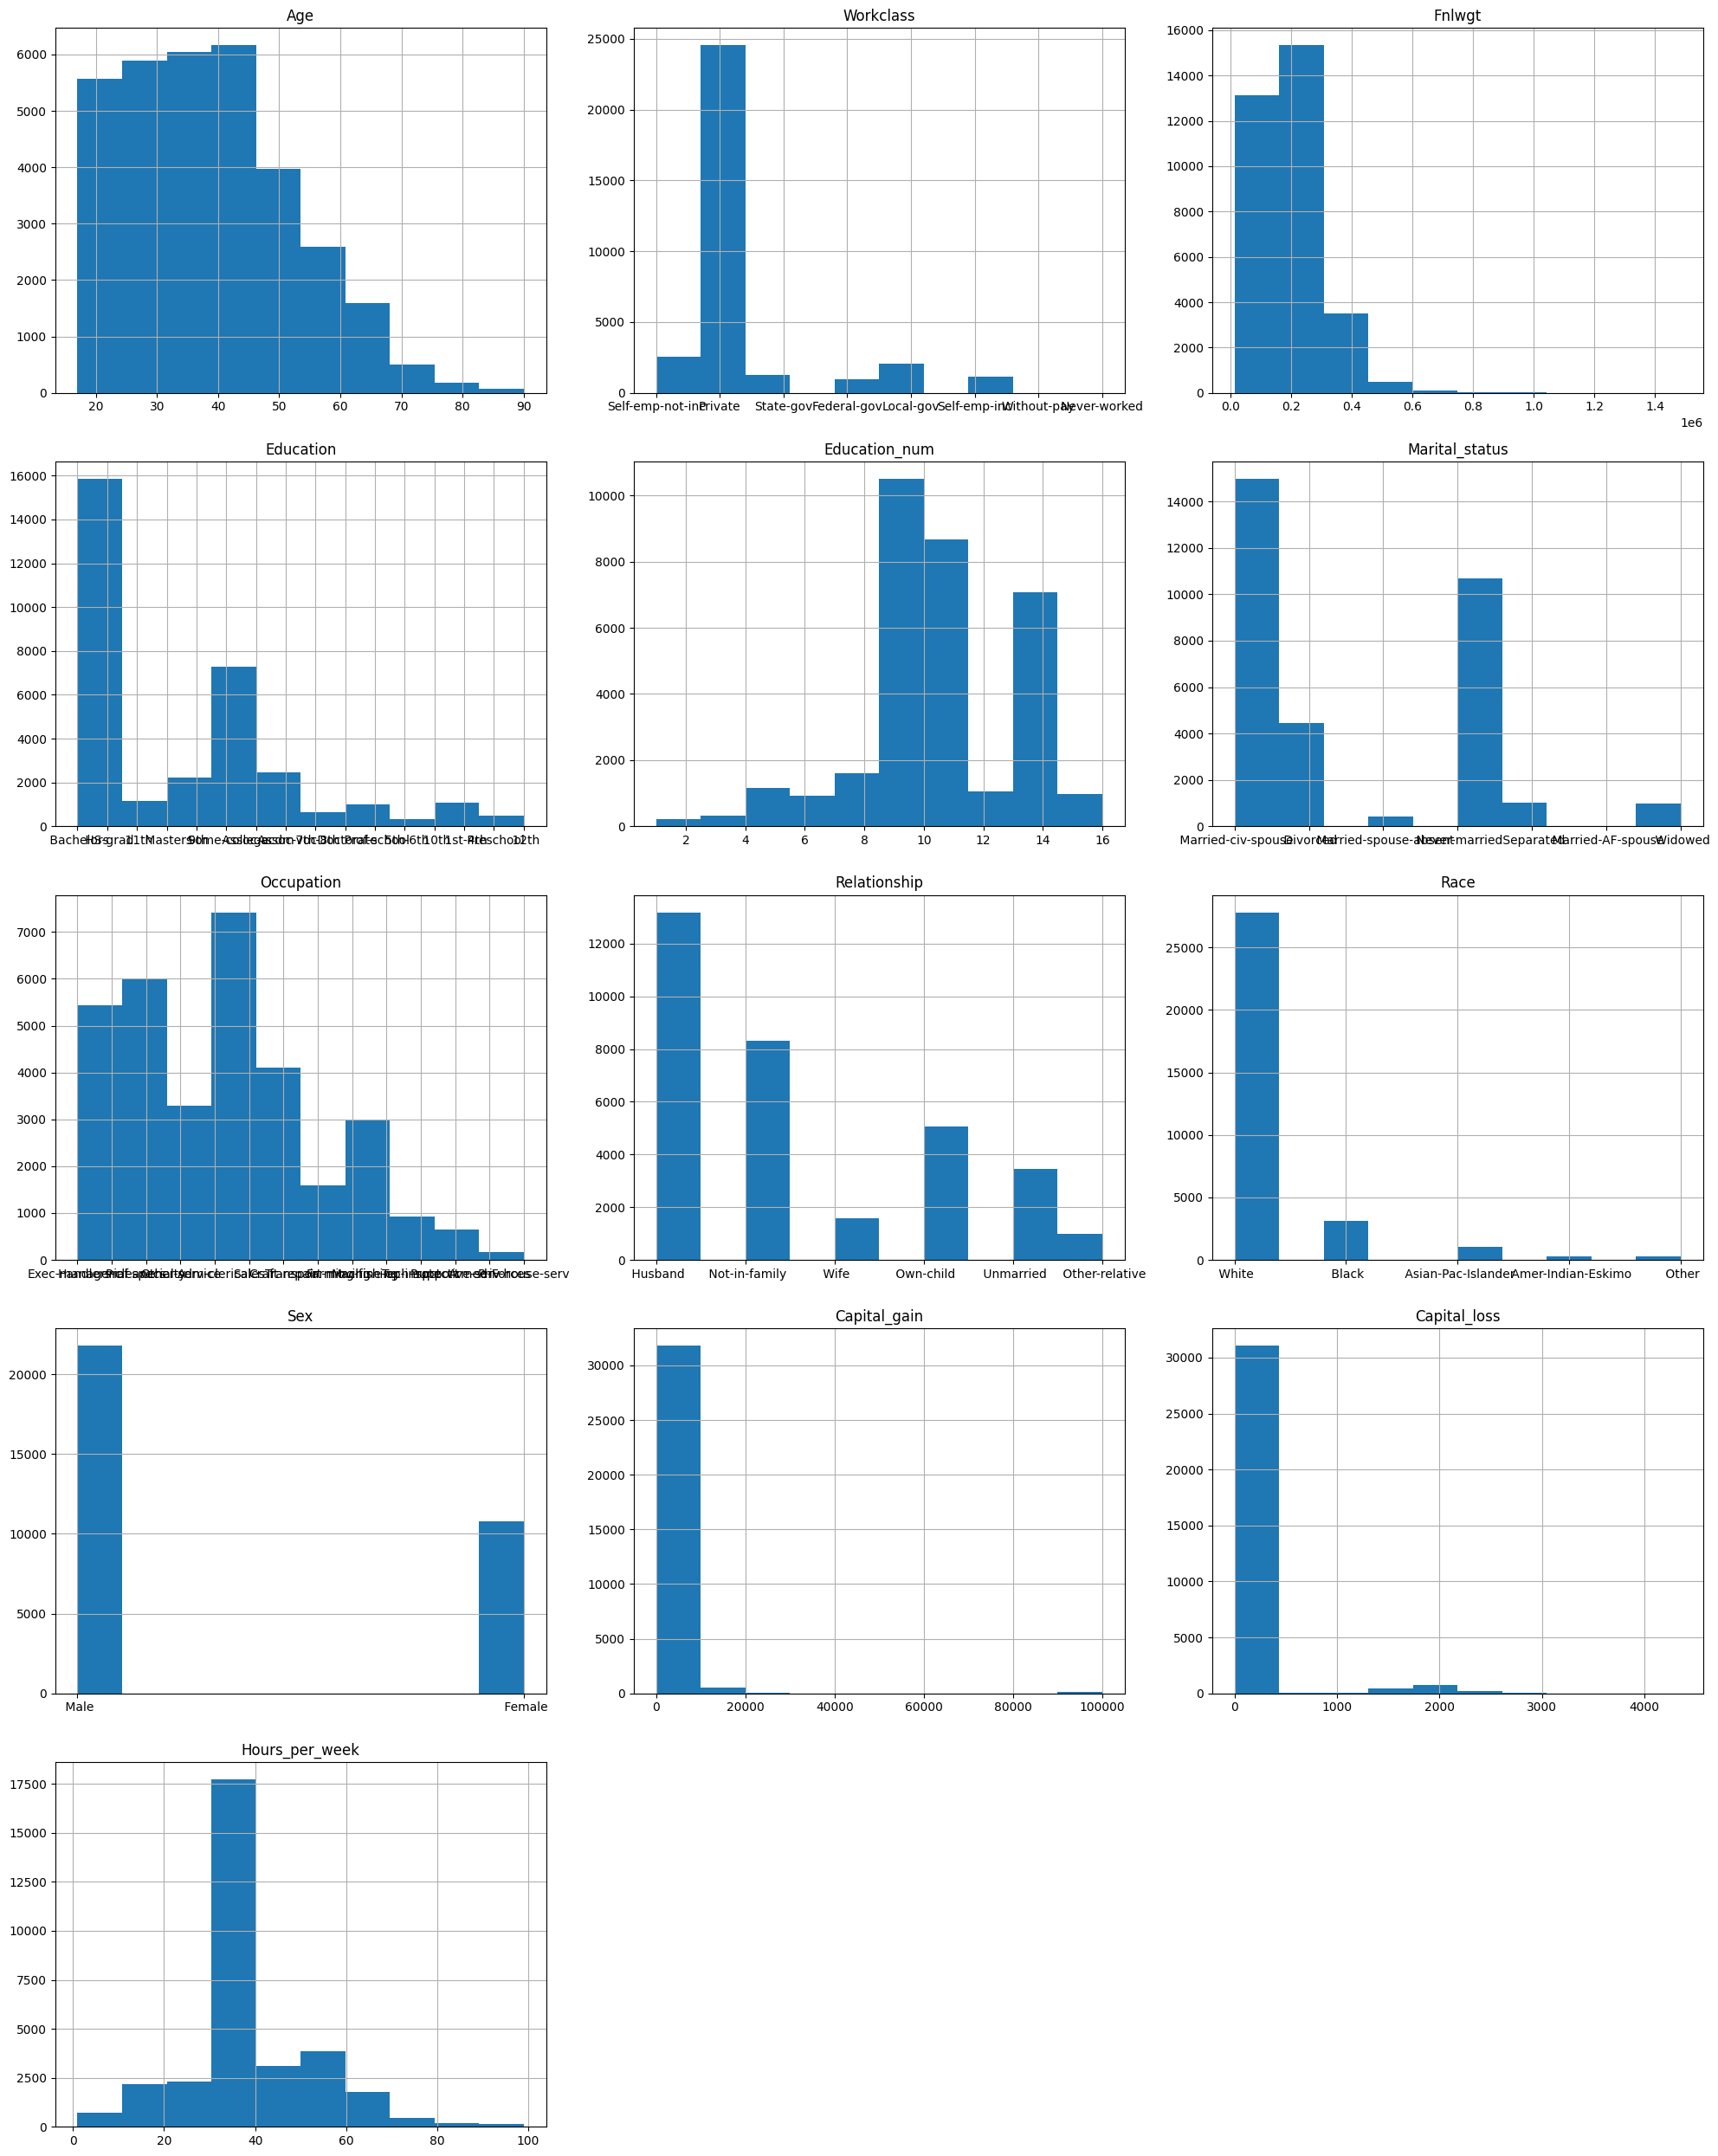

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 25), facecolor='white')

p = 1

columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country', 'Income']

for i in columns:
    if p <= 13:
        axs = plt.subplot(5, 3, p)
        # Assuming you want to plot histograms for each column
        df[i].hist(ax=axs)
        axs.set_title(i)
        p += 1

plt.tight_layout()
plt.show()


In [38]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [39]:
# separating categorical and numerical column

num_col=[]
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print('cat_col :-',cat_col)


print('num_col :-',num_col)




cat_col :- ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
num_col :- ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


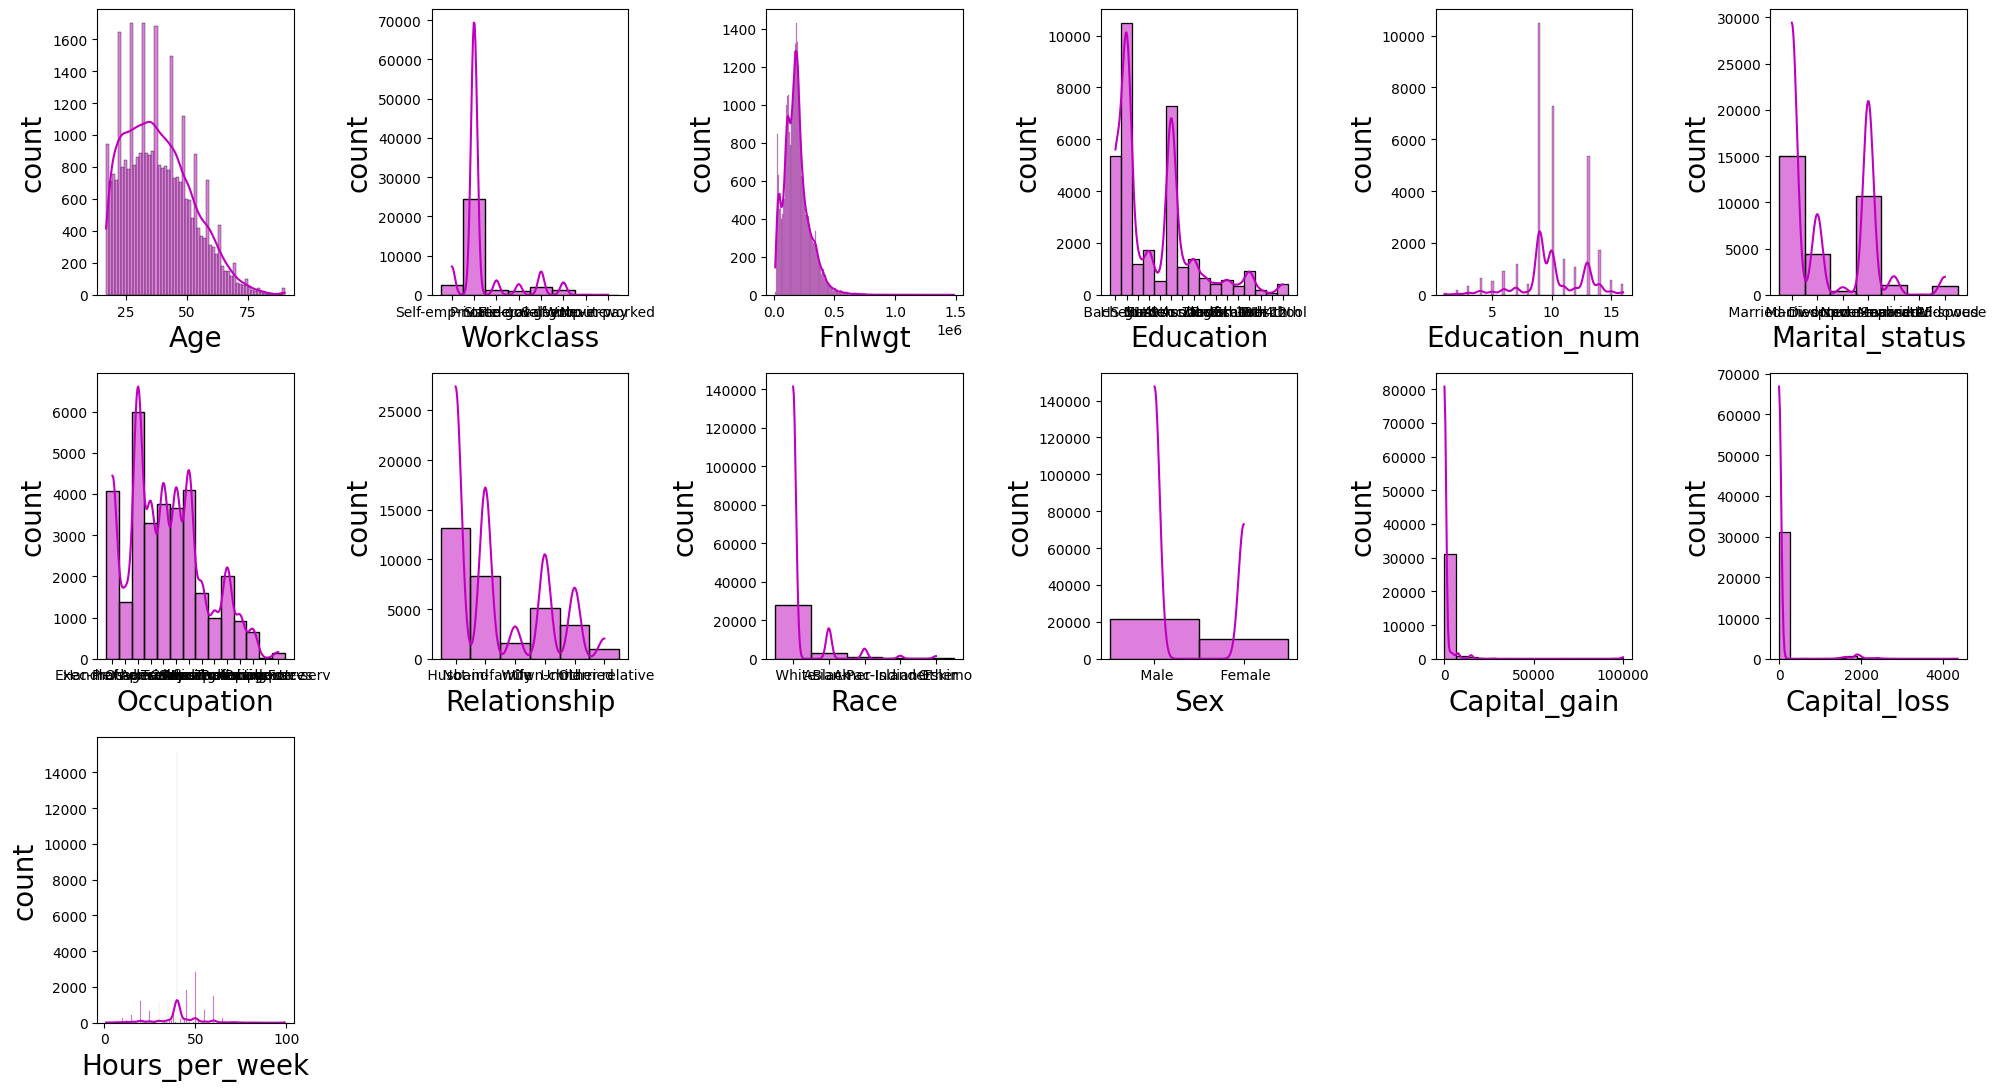

In [66]:
plt.figure(figsize=(20, 25), facecolor='white')

p = 1

for i in df.columns:
    if p <= 13:
        axs = plt.subplot(7, 6, p)  # Adjusted to 7 rows by 6 columns
        sns.histplot(df[i], kde=True, color='m', ax=axs)
        plt.xlabel(i, fontsize=20)  # Corrected to use column name as label
        plt.ylabel('count', fontsize=20)
        
        p += 1
plt.tight_layout()
plt.show()

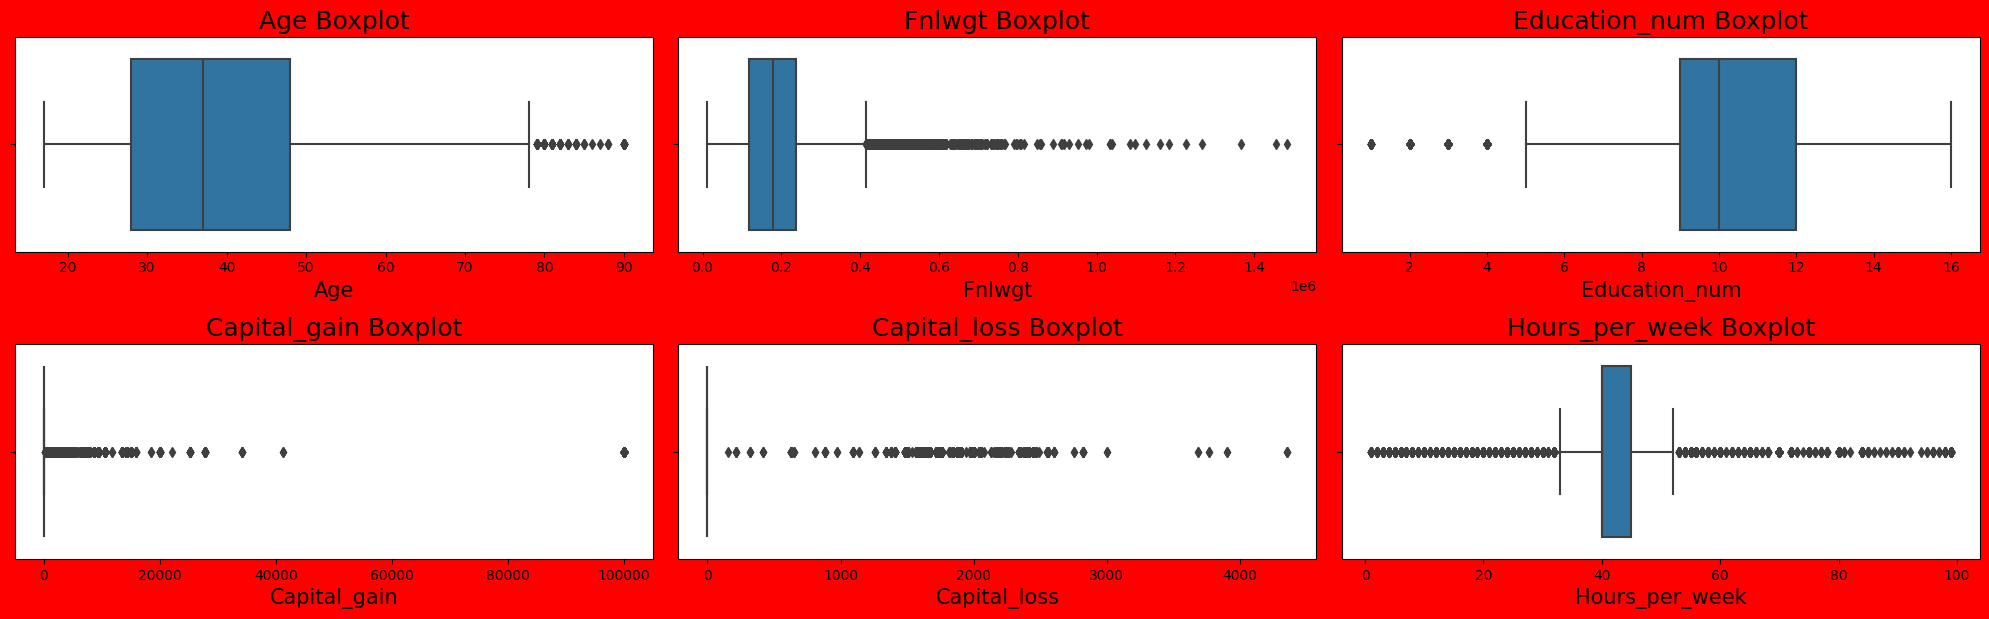

In [68]:
plt.figure(figsize=(20, 15), facecolor='red')



plotnumber = 1

for column in num_col:
    ax = plt.subplot(5, 3, plotnumber)
    sns.boxplot(x=df[column])
    plt.xlabel(column, fontsize=15)
    plt.title(f'{column} Boxplot', fontsize=18)
    plotnumber += 1

plt.tight_layout()
plt.show()

Age                   Axes(0.125,0.77;0.168478x0.11)
Fnlwgt             Axes(0.327174,0.77;0.168478x0.11)
Education_num      Axes(0.529348,0.77;0.168478x0.11)
Capital_gain       Axes(0.731522,0.77;0.168478x0.11)
Capital_loss         Axes(0.125,0.638;0.168478x0.11)
Hours_per_week    Axes(0.327174,0.638;0.168478x0.11)
dtype: object

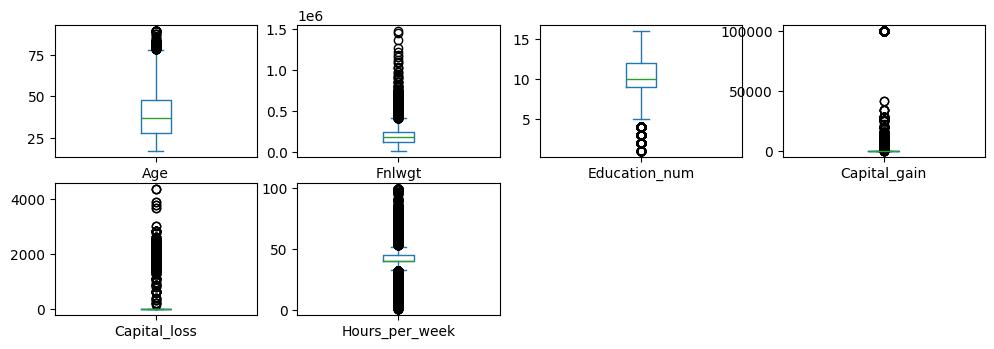

In [72]:
df.plot(kind='box', figsize=(12, 12), layout=(6, 4), sharex=False, subplots=True)


In [40]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [42]:
from scipy import stats

# Calculate Z-score for each numerical column
z_scores = stats.zscore(df.select_dtypes(include=['number']))

# Define a threshold for Z-score (e.g., 3 standard deviations)
threshold = 3

# Find indices of outliers
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

# Print number of outliers
print(f"Number of outliers: {outlier_indices.sum()}")

# Optionally, remove outliers from the DataFrame
df_no_outliers = df[~outlier_indices]

# Display the shape of the DataFrame after removing outliers
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")

Number of outliers: 2733
DataFrame shape after removing outliers: (29827, 15)


In [43]:
import numpy as np

# Select numerical columns for skewness correction
numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate skewness for each numerical column
skewness = df[numerical_cols].apply(lambda x: x.skew())

# Print skewness before transformation
print("Skewness before transformation:")
print(skewness)

# Apply log transformation to reduce skewness
df_log = df.copy()
df_log[numerical_cols] = df_log[numerical_cols].apply(lambda x: np.log1p(x))

# Calculate skewness after transformation
skewness_log = df_log[numerical_cols].apply(lambda x: x.skew())

# Print skewness after transformation
print("\nSkewness after log transformation:")
print(skewness_log)


Skewness before transformation:
Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

Skewness after log transformation:
Age              -0.113322
Fnlwgt           -0.842559
Education_num    -1.721168
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week   -2.357666
dtype: float64


In [44]:
# Encoding catogorical column using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df
    

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  float64
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  float64
 4   Education_num   32560 non-null  int64  
 5   Marital_status  32560 non-null  float64
 6   Occupation      32560 non-null  float64
 7   Relationship    32560 non-null  float64
 8   Race            32560 non-null  float64
 9   Sex             32560 non-null  float64
 10  Capital_gain    32560 non-null  int64  
 11  Capital_loss    32560 non-null  int64  
 12  Hours_per_week  32560 non-null  int64  
 13  Native_country  32560 non-null  float64
 14  Income          32560 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 3.7 MB


In [ ]:
# Model Building 

In [46]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report



In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  float64
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  float64
 4   Education_num   32560 non-null  int64  
 5   Marital_status  32560 non-null  float64
 6   Occupation      32560 non-null  float64
 7   Relationship    32560 non-null  float64
 8   Race            32560 non-null  float64
 9   Sex             32560 non-null  float64
 10  Capital_gain    32560 non-null  int64  
 11  Capital_loss    32560 non-null  int64  
 12  Hours_per_week  32560 non-null  int64  
 13  Native_country  32560 non-null  float64
 14  Income          32560 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 3.7 MB


In [51]:
x=df.drop('Income',axis=1)
y=df['Income']

In [52]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [11]:
#Interpretation of VIF Results VIF < 5: Generally indicates no multicollinearity. 5 ≤ VIF < 10: Indicates moderate multicollinearity. VIF ≥ 10: Indicates high multicollinearity and suggests that the variable should be investigated further.

In [54]:
# Standardize numerical features
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Function to calculate VIF
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['VIF_Values'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['Features'] = data.columns
    return vif

# Initial VIF calculation
vif = calculate_vif(x_scaled)
print(vif)

# Iteratively remove features with high VIF values
while vif['VIF_Values'].max() > 10:
    feature_to_remove = vif.loc[vif['VIF_Values'].idxmax(), 'Features']
    x_scaled = x_scaled.drop(columns=[feature_to_remove])
    vif = calculate_vif(x_scaled)
    print(vif)


    VIF_Values        Features
0     1.159016             Age
1     1.009990       Workclass
2     1.013713          Fnlwgt
3     1.159429       Education
4     1.216964   Education_num
5     1.127620  Marital_status
6     1.015556      Occupation
7     1.681266    Relationship
8     1.032540            Race
9     1.560741             Sex
10    1.028548    Capital_gain
11    1.015207    Capital_loss
12    1.128156  Hours_per_week
13    1.027429  Native_country


In [55]:
y.value_counts()

Income
0.0    24719
1.0     7841
Name: count, dtype: int64

In [56]:
# oversampling the data 
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)
x1
y1

# in Oversampling SMOTE will create new lines to balance the data
# in UnderSampling SMOTe will remove the lines or rows to balance the ratio of y 

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49433    1.0
49434    1.0
49435    1.0
49436    1.0
49437    1.0
Name: Income, Length: 49438, dtype: float64

In [57]:
# checking value count from target column 
y.value_counts()

Income
0.0    24719
1.0     7841
Name: count, dtype: int64

In [58]:
y1.value_counts() # see below the rows are now balanced

Income
0.0    24719
1.0    24719
Name: count, dtype: int64

In [ ]:
# Model building

In [59]:
# Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [60]:
maxAccu = 0
maxRS = 0

for i in range(1, 50):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    Pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, Pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print("Best Accuracy is:", maxAccu, "at random state:", maxRS)

Best Accuracy is: 0.9089805825242718 at random state: 19


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20, random_state=maxRS)

In [62]:
# Random Forest classifier 

# Checking accuracy for RandoForestClassifier 

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
PredRFC=RFC.predict(x_test)
print(accuracy_score(y_test,PredRFC))
print(confusion_matrix(y_test,PredRFC))
print(classification_report(y_test,PredRFC))

0.9065533980582524
[[4557  384]
 [ 540 4407]]
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91      4941
         1.0       0.92      0.89      0.91      4947

    accuracy                           0.91      9888
   macro avg       0.91      0.91      0.91      9888
weighted avg       0.91      0.91      0.91      9888



In [63]:
# Logistic Regresion
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
PredLR=LR.predict(x_test)
print(accuracy_score(y_test,PredLR))
print(confusion_matrix(y_test,PredLR))
print(classification_report(y_test,PredLR))


0.6574635922330098
[[3682 1259]
 [2128 2819]]
              precision    recall  f1-score   support

         0.0       0.63      0.75      0.68      4941
         1.0       0.69      0.57      0.62      4947

    accuracy                           0.66      9888
   macro avg       0.66      0.66      0.65      9888
weighted avg       0.66      0.66      0.65      9888



In [64]:
# Extra Tree Classfier 
from sklearn.ensemble import ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
PredET=RFC.predict(x_test)
print(accuracy_score(y_test,PredET))
print(confusion_matrix(y_test,PredET))
print(classification_report(y_test,PredET))


0.9065533980582524
[[4557  384]
 [ 540 4407]]
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91      4941
         1.0       0.92      0.89      0.91      4947

    accuracy                           0.91      9888
   macro avg       0.91      0.91      0.91      9888
weighted avg       0.91      0.91      0.91      9888



In [65]:
# Cross Vaidation method

from sklearn.model_selection import cross_val_score

In [66]:
# checking CV score for Randm Forest

score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print( "Difference between Accuracy score and cross validation score is : ", accuracy_score(y_test,PredRFC)-score.mean())

[0.7397856  0.8542678  0.9424555  0.94770911 0.94740568]
0.8863247393769662
Difference between Accuracy score and cross validation score is :  0.020228658681286205


In [67]:
# checking CV score for Logistic Regression

score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print( "Difference between Accuracy score and cross validation score is : ", accuracy_score(y_test,PredLR)-score.mean())

[0.68972492 0.66798139 0.65362055 0.67300496 0.65823809]
0.6685139814532044
Difference between Accuracy score and cross validation score is :  -0.011050389220194634


In [68]:
# checking CV score for ExtraTreesClassifier

score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print( "Difference between Accuracy score and cross validation score is : ", accuracy_score(y_test,PredET)-score.mean())

[0.75637136 0.85153722 0.93588188 0.9415394  0.94275311]
0.8856165916768873
Difference between Accuracy score and cross validation score is :  0.02093680638136508


Conclusion
Based on the mean cross-validation scores and the differences between the test accuracy and mean cross-validation scores, the Random Forest Classifier (RFC) is the better model. It has a significantly higher mean cross-validation score, suggesting it generalizes better, and the positive difference indicates consistent performance across the test set and cross-validation folds.

In [ ]:
# Hypertuning

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

RFC = RandomForestClassifier()

# Perform randomized search with cross-validation
rscv = RandomizedSearchCV(RFC, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rscv.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='accuracy')

In [71]:
# Print the best parameters and the best score
print("Best parameters found: ", rscv.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(rscv.best_score_))

Best parameters found:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best cross-validation accuracy: 0.90


In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  # To save the model

# Evaluate the best model on the test set
best_model = rscv.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test)



In [73]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(accuracy))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
importances = best_model.feature_importances_
feature_names = x_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importance_df)



Test set accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91      4941
         1.0       0.92      0.89      0.90      4947

    accuracy                           0.91      9888
   macro avg       0.91      0.91      0.91      9888
weighted avg       0.91      0.91      0.91      9888

Confusion Matrix:
[[4545  396]
 [ 542 4405]]
Feature Importances:
           Feature  Importance
5   Marital_status    0.191664
7     Relationship    0.156327
0              Age    0.101713
3        Education    0.097048
4    Education_num    0.086176
9              Sex    0.078891
12  Hours_per_week    0.078291
10    Capital_gain    0.070448
6       Occupation    0.045507
1        Workclass    0.039918
2           Fnlwgt    0.029565
11    Capital_loss    0.013242
8             Race    0.007018
13  Native_country    0.004191


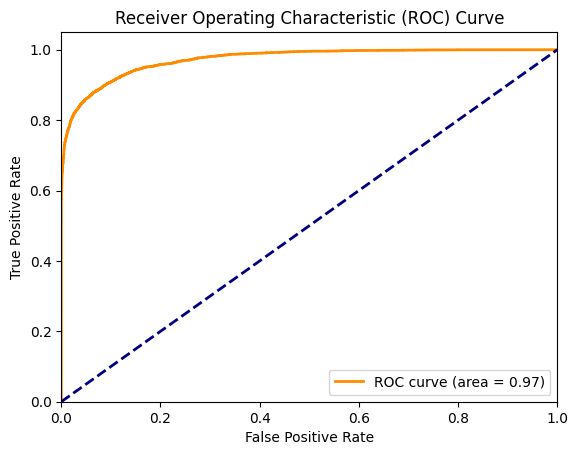

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_pred_prob = best_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [74]:

# Save the model to a file
joblib.dump(best_model, 'random_forest_best_model.pkl')
print("Model saved as random_forest_best_model.pkl")

Model saved as random_forest_best_model.pkl
